In [21]:
import pandas as pd

In [22]:
import json

In [23]:
dataframe=pd.DataFrame()

In [24]:
for year in range(2008,2022):
    fp=open('data/winter_{sy}-{ey}.json'.format(sy=year,ey=year+1))
    fd=pd.json_normalize(json.load(fp)['results'])
    fd_tmax=fd.groupby('datatype').get_group('TMAX')[['date','value']].set_index('date')
    #fd_tmax.rename(columns={'value':'TMAX'},inplace=True)
    fd_tmin=fd.groupby('datatype').get_group('TMIN')[['date','value']].set_index('date')
    #fd_tmin.rename(columns={'value':'TMIN'},inplace=True)
    tavg=(fd_tmax['value']+fd_tmin['value'])/2
    fd_tavg=pd.DataFrame(tavg)
    list_date=list()
    for dt in fd_tavg.index:
        y,m,d=dt.split('T')[0].split('-')
        list_date.append('{month}-{day}'.format(month=m,day=d))
    fd_tavg.index=list_date
    fd_tavg.rename(columns={'value':'{sy}-{ey}'.format(sy=year,ey=year+1)},inplace=True)
    dataframe=pd.concat([dataframe,fd_tavg],axis=1)
dataframe

,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022
12-15,-8.5,37.5,38.5,30.0,36.0,NaN,30.0,18.5,34.5,42.5,41.5,24.0,20.0,36.5
12-16,13.0,42.5,26.0,27.0,32.0,NaN,23.0,19.5,27.0,39.5,42.5,24.0,29.0,34.0
12-17,25.5,38.5,24.5,29.0,36.5,NaN,29.5,10.0,-6.0,31.5,42.5,28.5,34.0,27.5
12-18,16.5,30.0,25.5,41.5,33.5,NaN,33.0,29.5,3.5,37.0,41.0,42.0,28.0,24.5
12-19,29.0,32.5,38.0,29.5,15.5,NaN,34.0,38.0,23.5,38.0,39.0,32.0,30.0,44.0
12-20,15.5,38.0,36.5,29.5,28.0,NaN,35.0,37.0,41.5,47.5,33.5,35.5,33.0,42.5
12-21,9.5,45.5,27.5,30.0,38.5,NaN,39.0,35.0,39.5,20.5,43.5,47.0,45.5,43.0
12-22,15.0,36.0,27.5,15.0,40.0,NaN,31.0,37.0,30.5,25.5,26.5,51.5,45.5,46.5
12-23,19.0,20.0,34.0,21.5,40.0,NaN,26.5,29.0,36.5,24.0,31.5,49.5,21.5,47.0
12-24,27.0,12.0,31.5,24.0,25.0,NaN,34.0,25.0,40.5,10.0,33.5,42.0,35.5,40.5


In [25]:
dataframe.to_csv('data/all_data_avg.csv')

In [26]:
dataframe.fillna(0,inplace=True)
dataframe

,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020,2020-2021,2021-2022
12-15,-8.5,37.5,38.5,30.0,36.0,0.0,30.0,18.5,34.5,42.5,41.5,24.0,20.0,36.5
12-16,13.0,42.5,26.0,27.0,32.0,0.0,23.0,19.5,27.0,39.5,42.5,24.0,29.0,34.0
12-17,25.5,38.5,24.5,29.0,36.5,0.0,29.5,10.0,-6.0,31.5,42.5,28.5,34.0,27.5
12-18,16.5,30.0,25.5,41.5,33.5,0.0,33.0,29.5,3.5,37.0,41.0,42.0,28.0,24.5
12-19,29.0,32.5,38.0,29.5,15.5,0.0,34.0,38.0,23.5,38.0,39.0,32.0,30.0,44.0
12-20,15.5,38.0,36.5,29.5,28.0,0.0,35.0,37.0,41.5,47.5,33.5,35.5,33.0,42.5
12-21,9.5,45.5,27.5,30.0,38.5,0.0,39.0,35.0,39.5,20.5,43.5,47.0,45.5,43.0
12-22,15.0,36.0,27.5,15.0,40.0,0.0,31.0,37.0,30.5,25.5,26.5,51.5,45.5,46.5
12-23,19.0,20.0,34.0,21.5,40.0,0.0,26.5,29.0,36.5,24.0,31.5,49.5,21.5,47.0
12-24,27.0,12.0,31.5,24.0,25.0,0.0,34.0,25.0,40.5,10.0,33.5,42.0,35.5,40.5


In [27]:
%pip install seaborn

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
dataframe_hmap=dataframe.transpose()

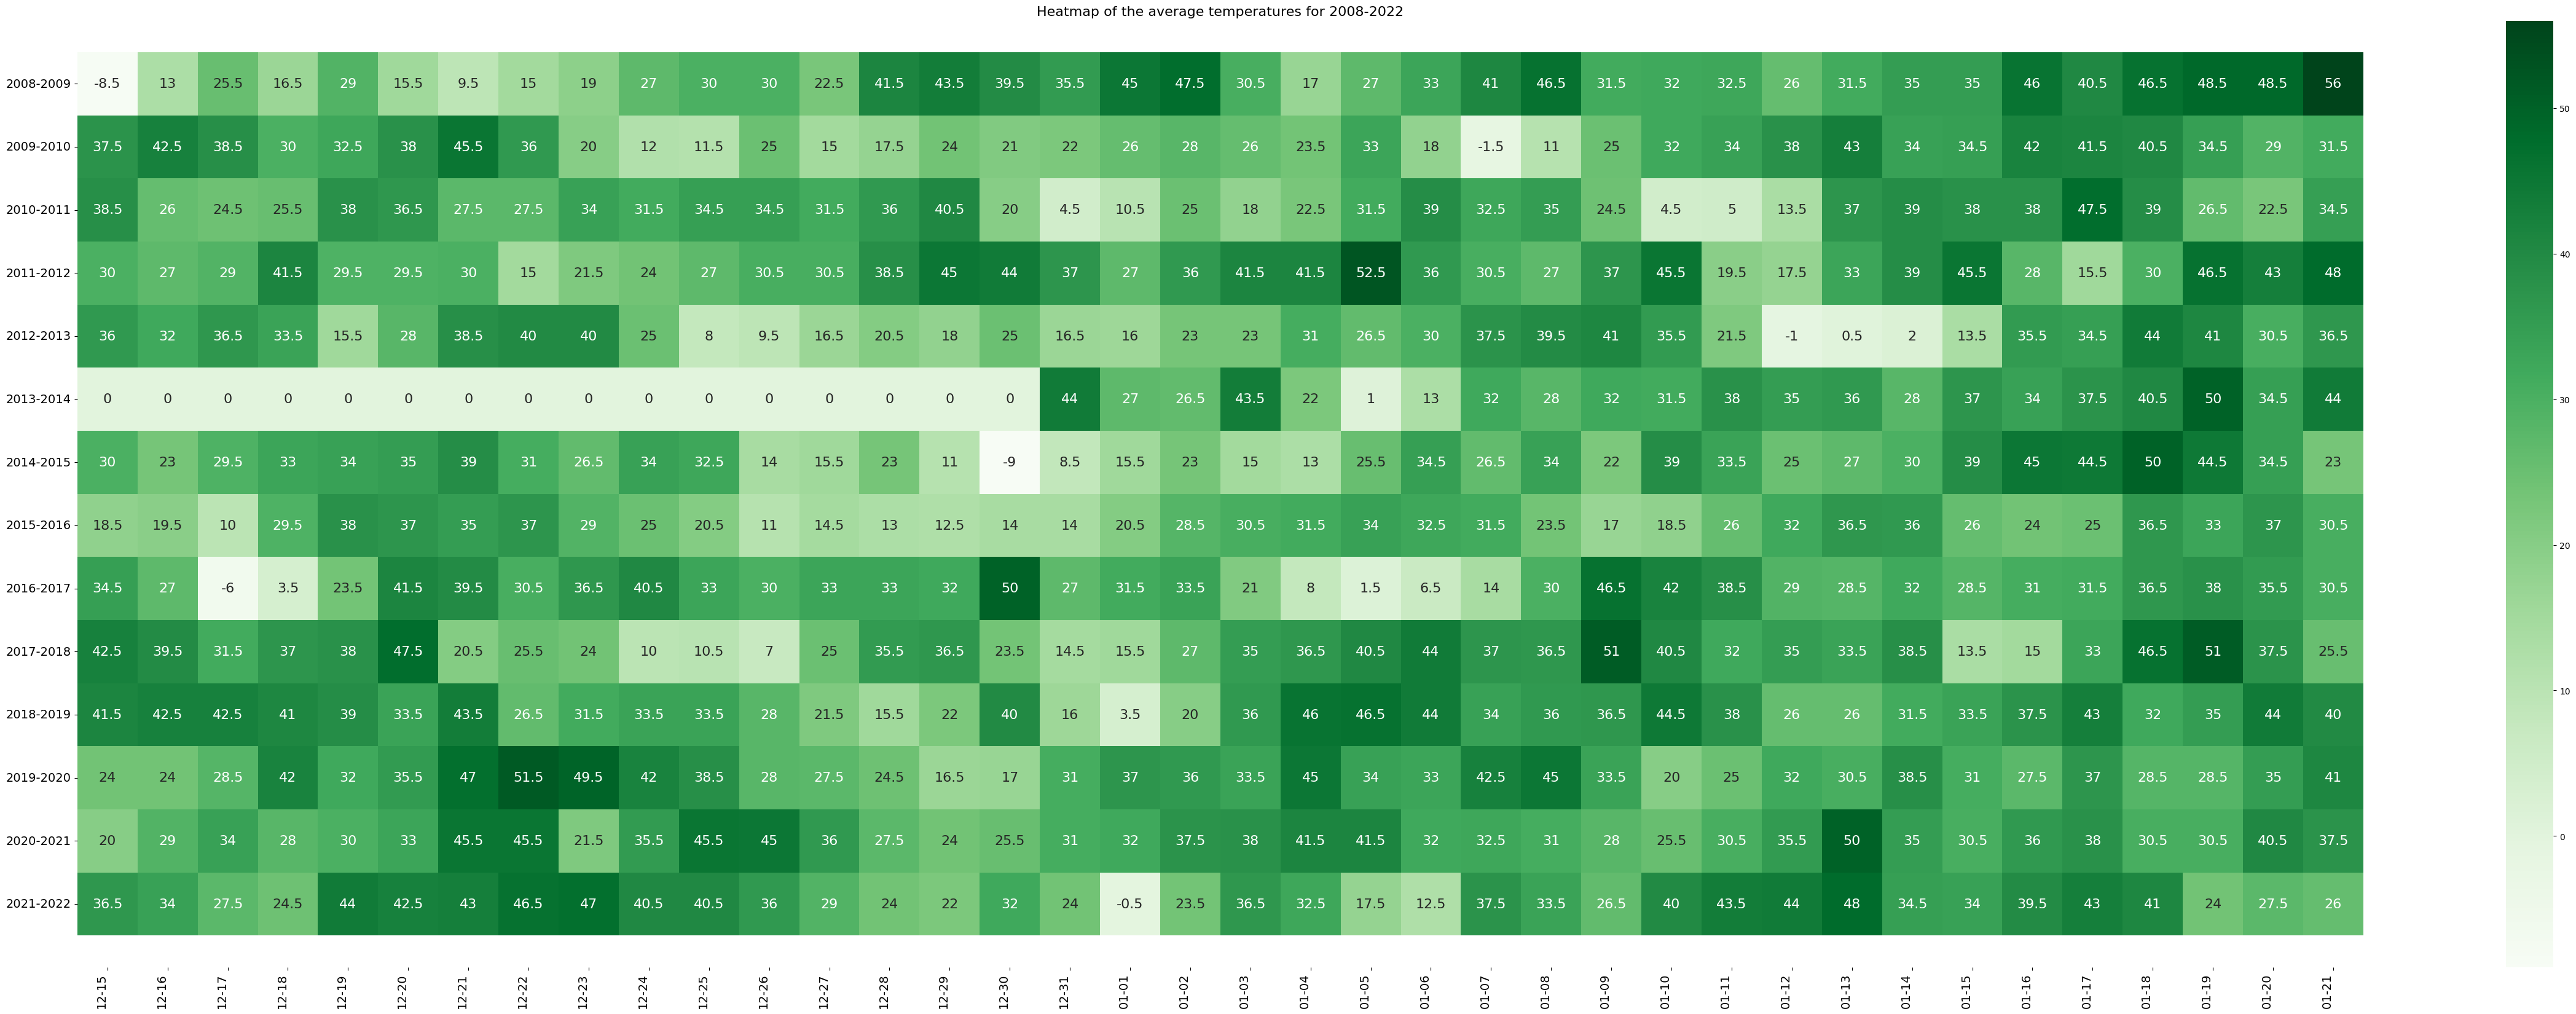

In [38]:
plt.figure(figsize=(60,20))
ax = sns.heatmap(dataframe_hmap, annot=True, fmt='g', cmap='Greens', annot_kws={'fontsize': 16})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title(label="Heatmap of the average temperatures for 2008-2022", fontsize=16)
plt.ylabel("")
plt.yticks(np.arange(len(dataframe_hmap.index))+0.5,dataframe_hmap.index,fontsize=14,rotation=0)
plt.xticks(fontsize=14,rotation=90,ha='right')
plt.savefig('data_hmap.jpg')